In [2]:
import numpy as np
import pandas as pd
from timeit import default_timer as timer 
import matplotlib.pyplot as plt

## Importiamo il DataSet

In [10]:
data = pd.read_csv(r'C:\Users\Claud\OneDrive\Desktop\project-a\MASTER CLASS MACHINE LEARNING\Regressione lineare\data\data_01.csv')
data.head()

,1.1,1
0,0.9,1.0
1,1.9,2.1
2,2.1,1.9
3,2.9,3.1
4,3.1,2.9


## Assegno i valori a X , Y , Teta0 = c & Teta1 = m , L = learning rate , n = numero features. 
### Creo un ciclo for :
*  Creo la regressione lineare (Teta1 * X + Teta0)
*  Creo le derivate di Teta1 e Teta0 (Coefficente angolare della retta & Intercetta)
*  Correggo Teta1 e Teta2  in base alle derivata della funzione di costo
*  Creo un grafico che mostra la nostra regressione lineare
*  Creo un timer che prende il tempo di addestramento del nostro ciclo for 

Eseguito in  3.666984500014223 secondi


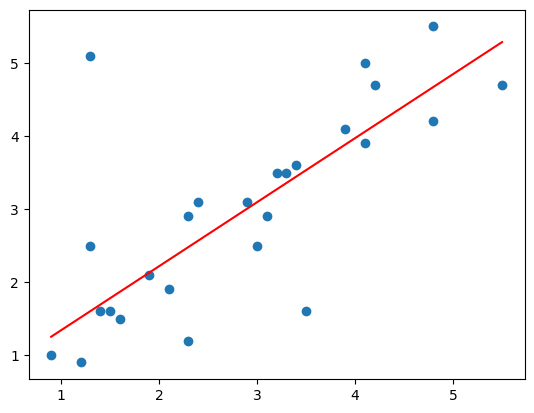

m 0.8768886479695355 c 0.4631608100545309


In [4]:
X = data.iloc[:,0]
Y = data.iloc[:,1]
m = 0
c = 0

L = 0.0001
epochs = 1000

n = len(X)
start = timer()
for o in range(15):
    for i in range(epochs):
        Y_pred = m * X  + c
        D_m = (-2 / n) * sum(X *(Y - Y_pred))
        D_c = (-2 / n) * sum(Y - Y_pred)
        m = m - L * D_m
        c = c - L * D_c
        
end = timer()

print('Eseguito in ', (end - start), 'secondi')
Y_pred = m * X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color = 'red')
plt.show()
print('m', m, 'c', c)

## Come possiamo notare dal tempo di esecuzione utilizzare un ciclo for per addestrare un modello e' piu veloce rispetto ad impostare lo stesso numero di epoche 

In [7]:
epochs = 15000
start = timer()
for i in range(epochs):
        Y_pred = m * X  + c
        D_m = (-2 / n) * sum(X *(Y - Y_pred))
        D_c = (-2 / n) * sum(Y - Y_pred)
        m = m - L * D_m
        c = c - L * D_c
        
end = timer()

print('Eseguito in ', (end - start), 'secondi')

Eseguito in  3.7640541999135166 secondi


## Procediamo ad effettura la normalizzazione dei nostri dati:
*  Definiamo i minimi e i massimi di X
*  Creiamo un array composto da 0 delle stesse dimensioni dell input
*  Creiamo un ulteriore ciclo for per effettuare la normalizzazione per ogni elemento con la formula (x - x_min) / (x_max - x_min)

In [21]:
def norm(arr):
    x_max = max(arr)
    x_min = min(arr)
    norm = np.zeros(shape=(len(arr), 1))
    for i, x in enumerate(arr):
        norm[i] = (x - x_min) / (x_max - x_min)
    return norm, x_min, x_max

X_norm, x_min, x_max = norm(X)
Y_norm, y_min, y_max = norm(Y)


## Diamo nuovi valori per m, c, L, epochs, n

In [22]:
m = 0 
c = 0
L = 0.1
epochs = 1000
n = len(X)

## Come possiamo vedere dai nostri risultati:
*   I valori normalizzati ci danno la possibilita di avere un addestramento piu performante perche non considera gli out-layer
*   I tempi di addestramento sono piu bassi 

eseguito in:  0.6056370000587776 secondi
m [0.77939296] c [0.74625779]


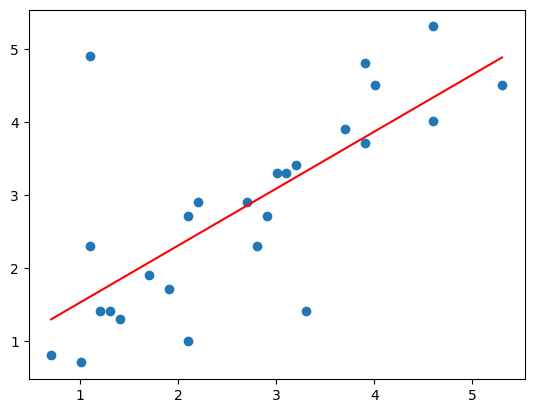

In [18]:
start = timer()
for o in range(15):
    for i in range(epochs):
        Y_pred = m * X_norm + c
        D_m = (-2 / n) * sum(X_norm * (Y_norm - Y_pred))
        D_c = (-2 / n) * sum(Y_norm - Y_pred)
        m = m - L * D_m
        c = c - L * D_c
end = timer()
print('eseguito in: ', (end-start), 'secondi')

Y_pred = m * X_norm + c

plt.scatter(X_norm, Y_norm)
plt.plot([min(X_norm), max(X_norm)],[min(Y_pred), max(Y_pred)], color= 'red')
plt.show
print('m', m, 'c', c)